### PGA

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Veri setini yükle
excel_path = 'TR.xlsx'
df = pd.read_excel(excel_path)
df

,Aylar,Enlem,Boylam,R,Mw
0,10,36.2608,31.6478,90.5,3.6
1,10,38.0863,36.6297,5.0,3.1
2,10,38.0105,36.4315,5.5,4.2
3,10,38.0163,37.4432,5.0,3.1
4,10,38.0758,36.5587,6.3,3.2
...,...,...,...,...,...
12768,5,38.7000,41.5000,30.0,5.2
12769,4,39.1000,42.5000,30.0,6.2
12770,4,39.0000,28.0000,20.0,5.6
12771,5,39.8000,30.5000,15.0,5.3


In [4]:
new_data = df.drop(columns=["Enlem","Boylam","Aylar"]).copy()
new_data

,R,Mw
0,90.5,3.6
1,5.0,3.1
2,5.5,4.2
3,5.0,3.1
4,6.3,3.2
...,...,...
12768,30.0,5.2
12769,30.0,6.2
12770,20.0,5.6
12771,15.0,5.3


In [5]:
# "R" sütunundaki 0 değerlerini say
zero_R_count = df[df['R'] == 0]['R'].count()

print(f"Number of zero values in 'R' column: {zero_R_count}")

Number of zero values in 'R' column: 0


In [6]:
import pandas as pd
import math



def calculate_pga(row):
    """
    Calculate Peak Ground Acceleration (PGA) using the given formula:
    log10(PGA) = 0.3646 + 0.4215 * M - 0.0187 * M**2 - 0.9707 * log10(R) - 0.0008 * R

    Parameters:
    - row: Pandas DataFrame row containing 'Mw' and 'R' columns

    Returns:
    - PGA: Peak Ground Acceleration
    """
    try:
        M = row['Mw']
        R = row['R']
        log10_PGA = 0.3646 + 0.4215 * M - 0.0187 * M**2 - 0.9707 * math.log10(R) - 0.0008 * R
        PGA = 10 ** log10_PGA
        return PGA
    except Exception as e:
        print(f"Error in calculate_pga: {e}")
        return None

# DataFrame'e yeni bir sütun ekleyerek her bir satır için PGA değerlerini hesaplamak
df['PGA'] = df.apply(calculate_pga, axis=1)

# Hesaplanan PGA değerlerini içeren DataFrame'i göstermek
print(df[['Mw', 'R', 'PGA']])

# Hesaplanan PGA değerlerini içeren DataFrame'i yeni bir Excel dosyasına yazmak
output_excel_path = 'TR_with_PGA.xlsx'  # Çıktı Excel dosyasının adını ve yolunu belirtin
df.to_excel(output_excel_path, index=False)

        Mw     R        PGA
0      3.6  90.5   0.465510
1      3.1   5.0   6.442476
2      4.2   5.5  12.077080
3      3.1   5.0   6.442476
4      3.2   6.3   5.507470
...    ...   ...        ...
12768  5.2  30.0   3.916611
12769  6.2  30.0   6.327474
12770  5.6  20.0   7.238660
12771  5.3  15.0   8.310654
12772  4.8  15.0   6.357995

[12773 rows x 3 columns]


In [7]:
data= pd.read_excel('TR_with_PGA.xlsx')
data

,Aylar,Enlem,Boylam,R,Mw,PGA
0,10,36.2608,31.6478,90.5,3.6,0.465510
1,10,38.0863,36.6297,5.0,3.1,6.442476
2,10,38.0105,36.4315,5.5,4.2,12.077080
3,10,38.0163,37.4432,5.0,3.1,6.442476
4,10,38.0758,36.5587,6.3,3.2,5.507470
...,...,...,...,...,...,...
12768,5,38.7000,41.5000,30.0,5.2,3.916611
12769,4,39.1000,42.5000,30.0,6.2,6.327474
12770,4,39.0000,28.0000,20.0,5.6,7.238660
12771,5,39.8000,30.5000,15.0,5.3,8.310654


In [8]:
# Veriyi ölçeklendirme 
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('TR_with_PGA.xlsx')
data_generation = data.drop(columns=["Enlem" , "Boylam","R","Mw"]).copy() 
scaler = StandardScaler()
data_generation_scaled = scaler.fit_transform(data_generation)
data_scaled = scaler.fit_transform(data)

In [9]:
print(data.isnull().sum())

Aylar     0
Enlem     0
Boylam    0
R         0
Mw        0
PGA       0
dtype: int64


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

scaler = StandardScaler()
data_generation_scaled = scaler.fit_transform(data_generation)
data_scaled = scaler.fit_transform(data)

In [11]:
kmeans_cluster_scores = []

for i in range(10, 220, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans_labels = kmeans.fit_predict(data)
    kmeans_labels_generation = kmeans.fit_predict(data_generation_scaled)
    
    kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
    kmeans_ch = calinski_harabasz_score(data_scaled, kmeans_labels)
    kmeans_db = davies_bouldin_score(data_scaled, kmeans_labels)

    kmeans_silhouette_generation = silhouette_score(data_generation_scaled, kmeans_labels_generation)
    kmeans_ch_generation = calinski_harabasz_score(data_generation_scaled, kmeans_labels_generation)
    kmeans_db_generation = davies_bouldin_score(data_generation_scaled, kmeans_labels_generation)

    scores_dict = {
        'n_clusters': i,
        'silhouette': kmeans_silhouette,
        'calinski_harabasz': kmeans_ch,
        'davies_bouldin': kmeans_db,
        'silhouette_generation': kmeans_silhouette_generation,
        'calinski_harabasz_generation': kmeans_ch_generation,
        'davies_bouldin_generation': kmeans_db_generation
    }

    kmeans_cluster_scores.append(scores_dict)

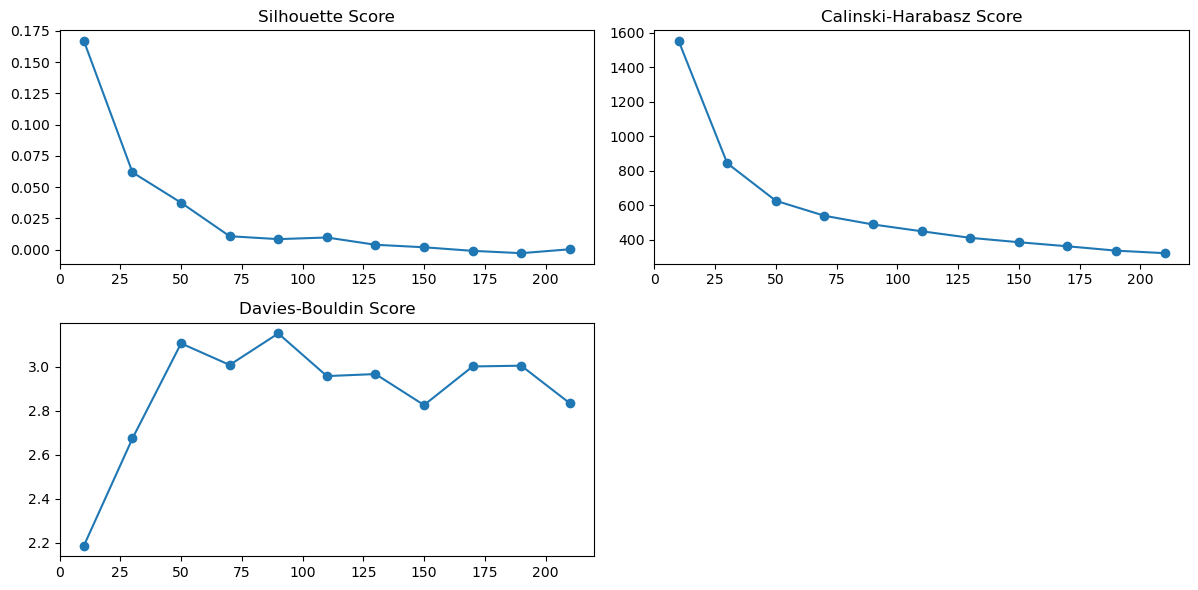

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot([score['n_clusters'] for score in kmeans_cluster_scores], [score['silhouette'] for score in kmeans_cluster_scores], marker='o')
plt.title('Silhouette Score')

plt.subplot(2, 2, 2)
plt.plot([score['n_clusters'] for score in kmeans_cluster_scores], [score['calinski_harabasz'] for score in kmeans_cluster_scores], marker='o')
plt.title('Calinski-Harabasz Score')

plt.subplot(2, 2, 3)
plt.plot([score['n_clusters'] for score in kmeans_cluster_scores], [score['davies_bouldin'] for score in kmeans_cluster_scores], marker='o')
plt.title('Davies-Bouldin Score')

plt.tight_layout()
plt.show()


In [13]:
kmeans = KMeans(n_clusters=10)
kmeans_labels_generation = kmeans.fit_predict(data_generation_scaled)
kmeans_silhouette_generation = silhouette_score(data_generation_scaled, kmeans_labels_generation)
kmeans_ch_generation = calinski_harabasz_score(data_generation_scaled, kmeans_labels_generation)
kmeans_db_generation = davies_bouldin_score(data_generation_scaled, kmeans_labels_generation)



# KMeans etiket sonuçlarını 'kmeans_labels' sütunu olarak veri setine ekliyoruz.
data['kmeans_labels'] = kmeans_labels_generation

In [14]:
# Küme etiketlerini DataFrame'e ekle
data['Cluster_Labels'] = kmeans_labels_generation + 1  # 1 ekleyerek küme etiketlerini 1'den başlat


In [15]:
# Her bir kümenin toplamını göster
for cluster_label in data['Cluster_Labels'].unique():
    cluster_data = data[data['Cluster_Labels'] == cluster_label]
    total_in_cluster = len(cluster_data)
    print(f"Toplam veri Cluster {cluster_label}'de: {total_in_cluster}")

Toplam veri Cluster 5'de: 1933
Toplam veri Cluster 4'de: 681
Toplam veri Cluster 8'de: 2005
Toplam veri Cluster 9'de: 318
Toplam veri Cluster 7'de: 914
Toplam veri Cluster 6'de: 93
Toplam veri Cluster 1'de: 1901
Toplam veri Cluster 2'de: 736
Toplam veri Cluster 10'de: 2086
Toplam veri Cluster 3'de: 2106


In [16]:
# Harita merkezini belirle
import folium
map_center = [data['Enlem'].mean(), data['Boylam'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Veri setindeki her bir noktayı haritaya ekleyin ve "PGA" değerlerine göre renklendirin
for index, row in data.iterrows():
    lat, lon, PGA, cluster_label = row['Enlem'], row['Boylam'], row['PGA'], row['Cluster_Labels']
    
    # Her bir küme sınıfını belirli bir renk ile göster
    cluster_colors = {1: 'red', 2: 'blue', 3: 'yellow', 4: 'pink', 5: 'brown', 6: 'green', 7: 'purple', 8: 'black' , 9: 'orange', 10: 'silver'}

    # Renk değerini doğru şekilde belirtin
    color = cluster_colors.get(cluster_label, 'gray')  # Bilinmeyen küme sınıfları için gri rengi kullan

    # Popup içeriğini oluştur
    popup_content = f"<b>Deprem Bilgileri</b><br>Enlem: {lat}<br>Boylam: {lon}<br>PGA Değeri: {PGA}<br>Küme Etiketi: {cluster_label}"

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=folium.Popup(popup_content, parse_html=True)  # Popup ekleyin
    ).add_to(m)

# Haritayı kaydet
m.save('PGA_cluster_map_with_popup.html')